# Merging all datasets

## Step 1: Importing the datasets

The first step is going to be importing all the individual datasets, this includes: binance chart data, fear and greed index, sentiment analysis data and social media data

In [41]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler


In [2]:
route_path = os.path.dirname(os.getcwd())


In [3]:
df_sentimental = pd.read_csv(os.path.join(route_path, 'Raw_Data','final_text_df.csv'))
df_social = pd.read_csv(os.path.join(route_path, 'Raw_Data','social_number_data.csv'))
df_binance = pd.read_csv(os.path.join(route_path, 'Raw_Data','BTCUSDT_daily_Binance.csv'))
df_fear_and_greed = pd.read_csv(os.path.join(route_path, 'Raw_Data','FearAndGreedIndex.csv'))


In [4]:
df_binance.rename(columns={'time': 'date'}, inplace=True)


In [5]:
df_sentimental.head()


,date,scored_title,scored_text,average_score
0,2019-01-08,-0.976681,0.600126,-0.188277
1,2019-06-18,0.933303,0.941063,0.937183
2,2019-06-27,0.767011,0.896741,0.831876
3,2019-07-10,0.603719,0.960887,0.782303
4,2020-01-09,0.951325,0.965697,0.958511


In [6]:
df_fear_and_greed


,date,FAGI_score,FAGI_sentiment
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Extreme Fear
4,2018-02-05,11,Extreme Fear
...,...,...,...
2126,2023-12-01,71,Greed
2127,2023-12-02,74,Greed
2128,2023-12-03,73,Greed
2129,2023-12-04,74,Greed


The next step is to merge all the datafiles. As the BTC binance chart data is already cleaned and processed with no missing values all the subsequent datasets will be left merged with this dataset.

In [7]:
df_merge = pd.merge(df_binance, df_fear_and_greed,how='left', on='date')
df_merge = pd.merge(df_merge, df_sentimental, how='left', on='date')
df_merge = pd.merge(df_merge, df_social, how='left', on='date')
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,0.0,2593963.0,794.0,107.41
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,0.0,2594931.0,760.0,102.06
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,0.0,0.0,0.0,0.00
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,0.0,0.0,0.0,0.00


## Preprocessing the data

Now the data can be preprocessed each column or set of data will be preprocessed differently and has to be dealt with differently.

The first process will be the sentimental data columns scored_title, scored_text and average_score. These are already scaled but empty values need to be processed. Given the empty values are due to no news articles this is the equivalent to news sentiment being completely neutral, or equal to score in the case of a score. So all empty values are input with a score of 0.

In [8]:
sentiment_columns = ['scored_title','scored_text','average_score']


In [9]:
df_merge[sentiment_columns] = df_merge[sentiment_columns].fillna(0)
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,0.0,2593963.0,794.0,107.41
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,0.0,2594931.0,760.0,102.06
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,0.0,0.0,0.0,0.00
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,0.0,0.0,0.0,0.00


In [10]:
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,0.0,2593963.0,794.0,107.41
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,0.0,2594931.0,760.0,102.06
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,0.0,0.0,0.0,0.00
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,0.0,0.0,0.0,0.00


The next process will be the social data which are columns; twitter_followers, twitter_favourites, reddit_subscribers, reddit_active_users, reddit_comments_per_day. The active users on reddit, twitter favourites and the comments per day which when plotted is more random which no linear trend so the mean will be applied for these. The other two coluns follow a linear pattern but have some missing elements so to process this the data will be inputed linearly and then finalised using a KNN imputer.

In [11]:
social_columns = ['twitter_followers','reddit_active_users','reddit_comments_per_day', 'twitter_favourites','reddit_subscribers']


In [12]:
df_merge[social_columns] = df_merge[social_columns].replace(0, np.nan)
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,NaN,2593963.0,794.0,107.41
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,NaN,2594931.0,760.0,102.06
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,NaN,NaN,NaN,NaN
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,NaN,NaN,NaN,NaN


First impute the mean value for active users and comments per day

In [13]:
columns_to_impute_mean = ['reddit_active_users','reddit_comments_per_day', 'twitter_favourites']


In [14]:
imputer_mean = SimpleImputer(strategy='mean')
df_merge[columns_to_impute_mean] = imputer_mean.fit_transform(df_merge[columns_to_impute_mean])


In [15]:
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,2163.435644,2593963.0,794.000000,107.410000
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,2163.435644,2594931.0,760.000000,102.060000
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,2163.435644,NaN,1747.715439,699.824346
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,2163.435644,NaN,1747.715439,699.824346


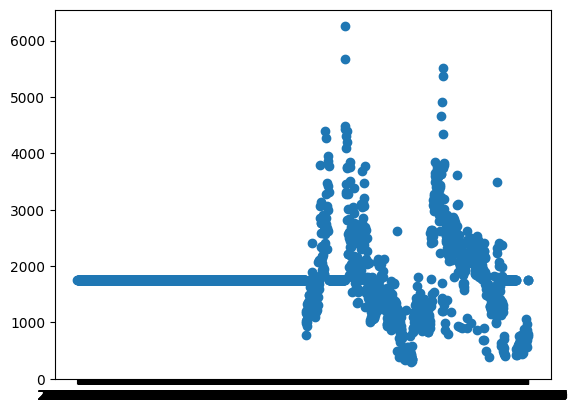

In [16]:
plt.scatter(x=df_merge['date'],y=df_merge['reddit_active_users'])


Now the final social media values can be imputed using the linear method and KNN imputer.

In [17]:
df_merge.at[0, 'twitter_followers'] = 1000
df_merge.at[0, 'reddit_subscribers'] = 1000
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,NaN,0.000000,0.000000,0.000000,1000.0,2163.435644,1000.0,1747.715439,699.824346
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,NaN,0.000000,0.000000,0.000000,NaN,2163.435644,NaN,1747.715439,699.824346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3171432.0,2163.435644,2593963.0,794.000000,107.410000
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3171829.0,2163.435644,2594931.0,760.000000,102.060000
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3172244.0,2163.435644,NaN,1747.715439,699.824346
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3172934.0,2163.435644,NaN,1747.715439,699.824346


In [18]:
imputer_knn = KNNImputer(n_neighbors=5)


In [19]:
columns_to_kNN_impute = ['twitter_followers','reddit_subscribers']


In [20]:
df_merge[columns_to_kNN_impute] = df_merge[columns_to_kNN_impute].interpolate(method='linear')


In [21]:
df_merge[columns_to_kNN_impute] = imputer_knn.fit_transform(df_merge[columns_to_kNN_impute])


In [36]:
df_merge.tail(50)


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
2247,2023-10-12,26875.52,26947.04,26555.00,26759.63,23428.64112,6.269091e+08,45.0,Fear,0.078889,-0.052367,0.013261,3148259.0,2163.435644,2530674.0,597.000000,222.520000,1.0
2248,2023-10-13,26759.63,27130.00,26685.00,26862.00,24115.76499,6.475538e+08,44.0,Fear,0.292148,0.923187,0.607667,3148468.0,2163.435644,2531677.0,551.000000,131.680000,1.0
2249,2023-10-14,26862.00,26989.58,26789.00,26852.48,10417.25576,2.800590e+08,47.0,Neutral,0.768374,-0.978237,-0.104931,3148693.0,2163.435644,2532650.0,632.000000,74.430000,2.0
2250,2023-10-15,26852.48,27293.33,26808.25,27154.15,15274.69170,4.126740e+08,45.0,Fear,0.938227,-0.025677,0.456275,3148902.0,2163.435644,2533659.0,583.000000,69.460000,1.0
2251,2023-10-16,27154.14,30000.00,27112.66,28500.78,78399.22445,2.210786e+09,47.0,Neutral,0.719313,0.356574,0.537944,3148838.0,2163.435644,2535043.0,763.000000,391.590000,2.0
2252,2023-10-17,28500.77,28613.65,28069.32,28395.91,38428.44532,1.090742e+09,52.0,Neutral,-0.192588,-0.960864,-0.576726,3150014.0,2163.435644,2536664.0,690.000000,254.850000,2.0
2253,2023-10-18,28395.91,28982.36,28142.87,28320.00,32162.47591,9.147735e+08,50.0,Neutral,-0.259204,-0.812501,-0.535852,3149590.0,2163.435644,2538841.0,461.000000,131.330000,2.0
2254,2023-10-19,28320.00,28916.89,28100.66,28713.71,35895.50179,1.023984e+09,52.0,Neutral,0.298035,0.024149,0.161092,3149924.0,2163.435644,2540467.0,536.000000,159.490000,2.0
2255,2023-10-20,28713.71,30207.55,28578.29,29669.04,59422.09920,1.753411e+09,53.0,Neutral,0.510745,0.962510,0.736628,3150471.0,2163.435644,2541561.0,524.000000,113.490000,2.0
2256,2023-10-21,29669.05,30379.99,29464.77,29909.80,27517.51897,8.219645e+08,63.0,Greed,0.850238,0.897327,0.873782,3151010.0,2163.435644,2542429.0,659.000000,73.120000,3.0


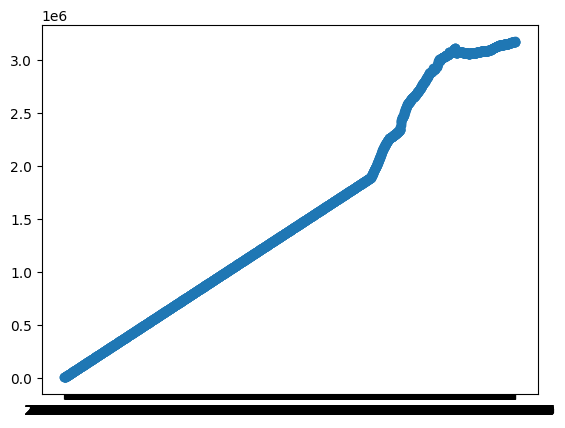

In [25]:
plt.scatter(x=df_merge['date'],y=df_merge['twitter_followers'])


So now the sentimental and social data is imputed, we will move onto the FAGI.

## Fear and Greed encoding and imputing

First we will start of encoding the FAGI_sentiment column, as it either Extreme Fear, Fear, Neutral, Greed or Extreme Greed we can use an ordinal encoder.

In [34]:
df_merge['FAGI_sentiment'] = df_merge['FAGI_sentiment'].replace(np.nan, 'Neutral')


In [35]:
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Extreme Fear","Fear","Neutral","Greed", "Extreme Greed"]])

# Fit it
ordinal_encoder.fit(df_merge[["FAGI_sentiment"]])

# Transforming categories into ordered numbers
df_merge["FAGI_sentiment_encoded"] = ordinal_encoder.transform(df_merge[["FAGI_sentiment"]])
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,NaN,Neutral,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,NaN,Neutral,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,NaN,Neutral,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,NaN,Neutral,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,NaN,Neutral,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3.172934e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


Then finally we can impute values for the FAGI score, like the sentiment we will impute neutral scores, which is a score of 50.

In [37]:
df_merge['FAGI_score'] = df_merge['FAGI_score'].replace(np.nan, 50)
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,FAGI_sentiment,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,50.0,Neutral,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,50.0,Neutral,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,50.0,Neutral,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,50.0,Neutral,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,50.0,Neutral,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,Greed,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,Greed,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,Greed,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,Greed,0.676125,0.648727,0.662426,3.172934e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


Now all values have been imputing, so we have no missing values. We can finally remove the FAGI_sentiment column so all columns are numerical.

In [38]:
df_merge.drop(columns='FAGI_sentiment', inplace=True)
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,50.0,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,50.0,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,50.0,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,50.0,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,50.0,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,0.676125,0.648727,0.662426,3.172934e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


Before we scale the data, we add in one final preprocessing step for any additional numerical values, this will make any values equal to zero if they are NaN.

In [40]:
df_merge = df_merge.replace(np.NaN, 0)
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,50.0,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,50.0,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,50.0,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,50.0,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,50.0,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,0.676125,0.648727,0.662426,3.172934e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


## Scaling the data

The final step of the preprocessing is to scale the data. The scaler to be used will be a MinMaxScaler

In [46]:
numeric_columns = df_merge.select_dtypes(include=['float', 'int']).columns

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Scale numeric columns excluding the date column
df_merge[numeric_columns] = scaler.fit_transform(df_merge[numeric_columns])


In [47]:
df_merge


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,0.016685,0.018394,0.021824,0.017036,0.000746,0.000142,0.500000,0.502471,0.501496,0.501780,0.000000,0.559941,0.000000,0.244542,0.148658,0.50
1,2017-08-18,0.017052,0.016661,0.017692,0.014290,0.001278,0.000235,0.500000,0.502471,0.501496,0.501780,0.000381,0.559941,0.000162,0.244542,0.148658,0.50
2,2017-08-19,0.014305,0.013818,0.016292,0.014781,0.000201,0.000033,0.500000,0.502471,0.501496,0.501780,0.000763,0.559941,0.000324,0.244542,0.148658,0.50
3,2017-08-20,0.014796,0.014220,0.019172,0.013946,0.000314,0.000055,0.500000,0.502471,0.501496,0.501780,0.001144,0.559941,0.000486,0.244542,0.148658,0.50
4,2017-08-21,0.013695,0.012828,0.017267,0.012854,0.000610,0.000104,0.500000,0.502471,0.501496,0.501780,0.001525,0.559941,0.000647,0.244542,0.148658,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,0.537672,0.525507,0.541484,0.532485,0.027662,0.045598,0.755556,0.942309,0.992260,0.968495,0.999271,0.559941,0.999627,0.084550,0.013725,0.75
2293,2023-11-27,0.532493,0.521773,0.534497,0.529303,0.039150,0.063649,0.677778,0.852918,0.981819,0.918425,0.999396,0.559941,1.000000,0.078846,0.012507,0.75
2294,2023-11-28,0.529311,0.534063,0.537043,0.538259,0.049070,0.080930,0.700000,0.830745,0.661019,0.746425,0.999527,0.559941,1.000000,0.244542,0.148658,0.75
2295,2023-11-29,0.538266,0.535174,0.548108,0.538815,0.043086,0.071667,0.744444,0.848859,0.833886,0.842202,0.999744,0.559941,1.000000,0.244542,0.148658,0.75
